In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Загрузите данные по вариантам в ноутбук.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/мо/Вариант 3.xlsx')
df.head(3)

,03-Физика,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
2,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36


In [ ]:
df.rename(columns={df.columns[i]:df.iloc[1][i] for i in range(df.shape[1])}, inplace=True)
df.drop(['Устная часть'], axis=1, inplace=True)
df.drop(index=[0, 1], axis=0, inplace=True)
df.head(3)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл
2,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),3,10,36
3,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),4,14,36
4,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),5,17,36


# 2. Сделайте описательную статистику полученных данных.


In [ ]:
df.describe()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл
count,1180,1180,1180,1180,1180,1180,1180,1180,1181.0,1180
unique,1180,19,10,2,20,1160,203,50,51.0,1
top,1,148,11,М,328,++++222+++22+++222++2++2+++,0(3)0(3)0(3)0(3)0(3),14,40.0,36
freq,1,214,949,810,199,11,588,63,63.0,1180


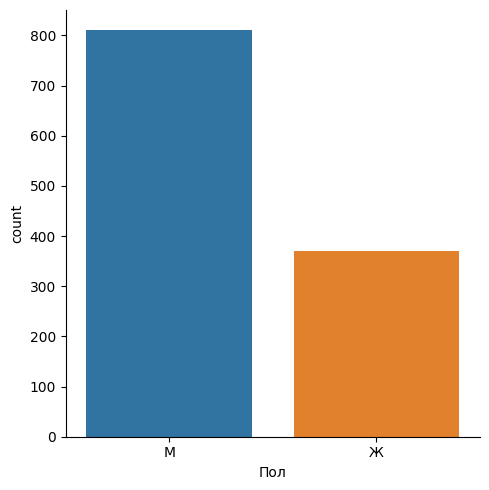

In [ ]:
sns.catplot(data = df, x = 'Пол', kind = 'count')

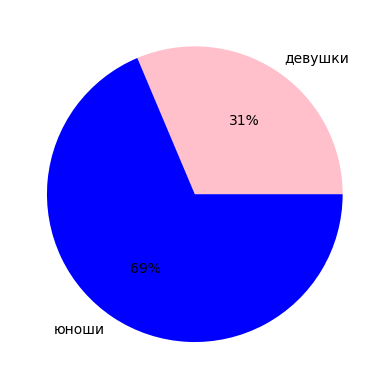

In [ ]:
mg = [df[df['Пол'] == 'Ж'].shape[0] / df['Пол'].shape[0], df[df['Пол'] == 'М'].shape[0] / df['Пол'].shape[0]]
plt.pie(mg, labels = ['девушки', 'юноши'], colors = ['pink', 'blue'], autopct='%.0f%%')
plt.show()

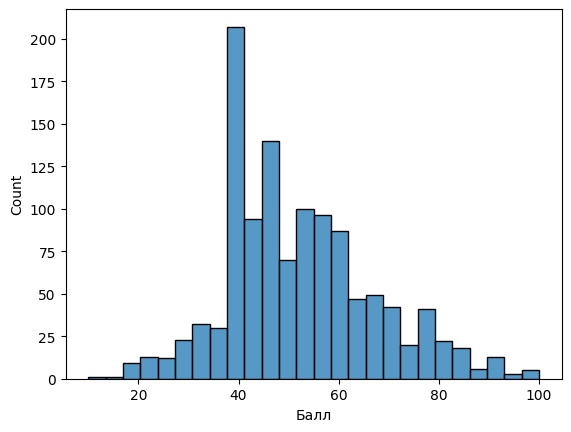

In [ ]:
ax = sns.histplot(data = df, x = 'Балл')

In [ ]:
df['Балл'].max()

100

In [ ]:
df['Балл'].min()

10

In [ ]:
df['Балл'].mean()

52.047457627118646

# 3. Найдите процент учащихся, выполнивших работу ниже среднего.


In [ ]:
(df[df['Балл'] < df['Балл'].mean()].shape[0] / df['Балл'].shape[0])*100


56.223539373412365

# 4. Найти процент учащихся не сдавших экзамен.

In [ ]:
(df[df['Балл'] < 36].shape[0] / df.shape[0])*100

7.705334462320068

# 5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

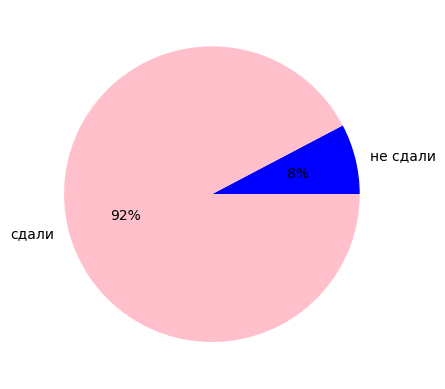

In [ ]:
cr = [df[df['Балл'] < 36].shape[0] / df.shape[0], df[df['Балл'] >= 36].shape[0] / df.shape[0]]
plt.pie(cr, labels = ['не сдали', 'сдали'], colors = ['blue', 'pink'], autopct='%.0f%%')
plt.show()

# 6. Постройте ядерную оценку плотности по распределению баллов за экзамен.

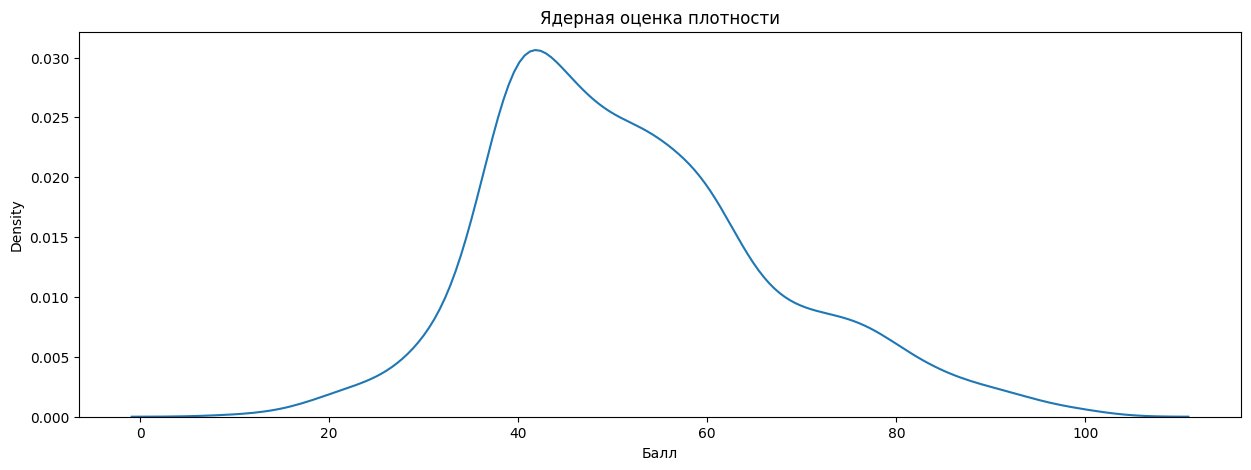

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Ядерная оценка плотности")
sns.kdeplot(df['Балл'])
plt.show()

# 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [ ]:
ball = [0, 36, 53, 68, 100]
rez = ['неудовлетворительно', 'удовлетворительно', 'хорошо', 'отлично']
for i in range(len(ball)-1):
    pop = (df[(df['Балл'] >= ball[i]) & (df['Балл'] < ball[i+1])].shape[0] / df.shape[0]) * 100
    print(f'{rez[i]} - {pop}%')

неудовлетворительно - 7.705334462320068%
удовлетворительно - 48.602878916172735%
хорошо - 27.77307366638442%
отлично - 15.749364944961897%


# 8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [ ]:
print('Количество девушек:', (df[df['Пол'] == 'Ж'].shape[0] / df['Пол'].shape[0]) * 100)
print('Количество юношей:', (df[df['Пол'] == 'М'].shape[0] / df['Пол'].shape[0]) *100)

Количество девушек: 31.329381879762913
Количество юношей: 68.58594411515665


# 9. Сколько школ принимало участие в экзамене?

In [ ]:
len(df['№ школы'].unique())

20

# 10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [ ]:
print('заданий с кратким ответом:', len(df['Задания с кратким ответом'][2]))
print('заданий с развёрнутым ответом:', len(df['Задания с развёрнутым ответом'][2].split('(3)')) - 1)

заданий с кратким ответом: 27
заданий с развёрнутым ответом: 5


# 11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1, ... Вк. Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [ ]:
result = {}
for x in df['Задания с кратким ответом'][:-1]:
    k = 0
    for i in x:
        k += 1
        if i == '-' or i == '0':
            result[k] = result.get(k, 0) + 1
res = dict(sorted(result.items()))
res

{1: 173,
 2: 155,
 3: 446,
 4: 655,
 5: 201,
 6: 202,
 7: 225,
 8: 406,
 9: 307,
 10: 767,
 11: 191,
 12: 291,
 13: 512,
 14: 578,
 15: 678,
 16: 214,
 17: 386,
 18: 465,
 19: 213,
 20: 294,
 21: 243,
 22: 581,
 23: 448,
 24: 46,
 25: 827,
 26: 744,
 27: 829}

In [ ]:
spis = range(1,28)
for i in range(1, 28):
    zna = res[i] / len(df['Задания с развёрнутым ответом'][:-1]) * 100
    print(f'Задание B{i} не выполнило {zna} %, выполнило {100-zna} %')

Задание B1 не выполнило 14.661016949152541 %, выполнило 85.33898305084746 %
Задание B2 не выполнило 13.135593220338984 %, выполнило 86.86440677966101 %
Задание B3 не выполнило 37.79661016949152 %, выполнило 62.20338983050848 %
Задание B4 не выполнило 55.50847457627118 %, выполнило 44.49152542372882 %
Задание B5 не выполнило 17.033898305084747 %, выполнило 82.96610169491525 %
Задание B6 не выполнило 17.11864406779661 %, выполнило 82.88135593220339 %
Задание B7 не выполнило 19.06779661016949 %, выполнило 80.9322033898305 %
Задание B8 не выполнило 34.40677966101695 %, выполнило 65.59322033898306 %
Задание B9 не выполнило 26.016949152542374 %, выполнило 73.98305084745763 %
Задание B10 не выполнило 65.0 %, выполнило 35.0 %
Задание B11 не выполнило 16.1864406779661 %, выполнило 83.8135593220339 %
Задание B12 не выполнило 24.661016949152543 %, выполнило 75.33898305084746 %
Задание B13 не выполнило 43.389830508474574 %, выполнило 56.610169491525426 %
Задание B14 не выполнило 48.983050847457626

# 12. Аналогично и с типом С (ответы с развернутым ответом)

In [ ]:
result1 = {}
for x in df['Задания с развёрнутым ответом'][:-1]:
    k = 0
    for i in x.split('(3)'):
        k += 1
        if i == '0':
            result1[k] = result.get(k, 0) + 1
result1

{1: 973, 2: 730, 3: 988, 4: 905, 5: 806}

In [ ]:
spis = ['C1', 'C2', 'C3', 'C4', 'C5']
for i in range(1, 6):
    zna = result1[i] / len(df['Задания с развёрнутым ответом'][:-1]) * 100
    print(f'Задание {spis[i-1]} не выполнило {zna} %, выполнило {100-zna} %')

Задание C1 не выполнило 82.45762711864407 %, выполнило 17.54237288135593 %
Задание C2 не выполнило 61.86440677966102 %, выполнило 38.13559322033898 %
Задание C3 не выполнило 83.72881355932203 %, выполнило 16.271186440677965 %
Задание C4 не выполнило 76.69491525423729 %, выполнило 23.305084745762713 %
Задание C5 не выполнило 68.30508474576271 %, выполнило 31.694915254237287 %


# 13. Сделайте анализ по двум школам: 1) по всем выполненным заданиям типа В, 2) по заданиям типа С больше 50%, 3) по среднему баллу юношей и девушек

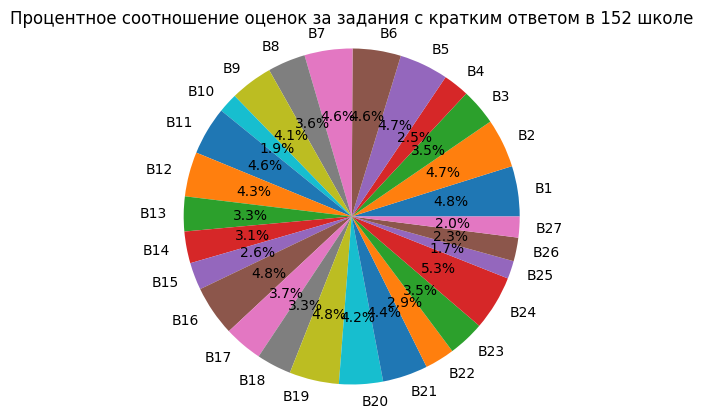

In [ ]:
#1
df152 = df[df['№ школы'] == 152]
result = {}
for x in df152["Задания с кратким ответом"][:-1]:
    k = 0
    for i in x:
        k += 1
        if i == '+' or i == '1' or i == '2':
            result[k] = result.get(k, 0) + 1
res = dict(sorted(result.items()))
labels = ['B' + str(key) for key, value in res.items()]
values = [value for key, value in res.items()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis("equal")
plt.title('Процентное соотношение оценок за задания с кратким ответом в 152 школе')
plt.show()

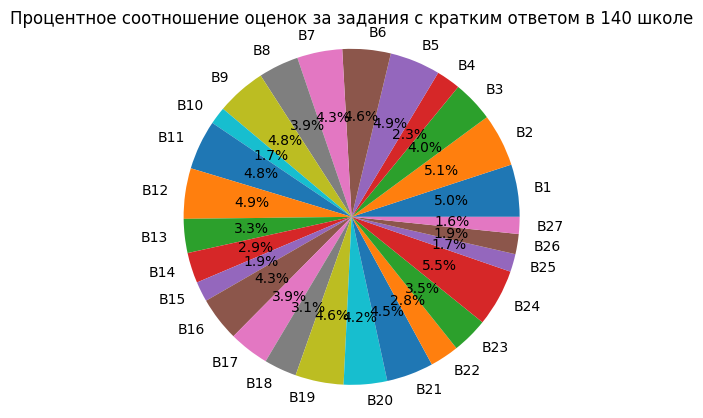

In [ ]:
df140 = df[df['№ школы'] == 140]
result = {}
for x in df140["Задания с кратким ответом"][:-1]:
    k = 0
    for i in x:
        k += 1
        if i == '+' or i == '1' or i == '2':
            result[k] = result.get(k, 0) + 1
res = dict(sorted(result.items()))
labels = ['B' + str(key) for key, value in res.items()]
values = [value for key, value in res.items()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis("equal")
plt.title('Процентное соотношение оценок за задания с кратким ответом в 140 школе')
plt.show()

In [ ]:
#3
school_152 = df[df['№ школы'] == 152]
school_140 = df[df['№ школы'] == 140]

boys_152 = school_152[school_152['Пол'] == 'М']
girls_152 = school_152[school_152['Пол'] == 'Ж']
boys_140 = school_140[school_140['Пол'] == 'М']
girls_140 = school_140[school_140['Пол'] == 'Ж']
print(f"Средний балл юношей в школе 152: {boys_152['Балл'].mean()}")
print(f"Средний балл девушек в школе 152: {girls_152['Балл'].mean()}")
print(f"Средний балл юношей в школе 140: {boys_140['Балл'].mean()}")
print(f"Средний балл девушек в школе 140: {girls_140['Балл'].mean()}")

Средний балл юношей в школе 152: 53.89915966386555
Средний балл девушек в школе 152: 58.11764705882353
Средний балл юношей в школе 140: 50.64835164835165
Средний балл девушек в школе 140: 49.54545454545455
